In [ ]:
"""
3.1 Warming Up Exercises - Basic Inspection and Exploration:
    Problem 1 - Data Read, Write and Inspect:
                Complete all following Task:
                 • Dataset for the Task: "bank.csv"
                    1. Load the provided dataset and import in pandas DataFrame.
                    2. Check info of the DataFrame and identify following:
                      (a) columns with dtypes=object
                      (b) unique values of those columns.
                      (c) check for the total number of null values in each column.
                    3. Drop all the columns with dtypes object and store in new DataFrame, also write the DataFrame in”.csv” with name ”banknumericdata.csv”
                    4. Read ”banknumericdata.csv” and Find the summary statistics.
"""

# 3.1- Question-1
import pandas as pd

# reading csv file
df=pd.read_csv("/content/drive/MyDrive/Concepts of technologies and AI/bank .csv")
# displaying the result
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [ ]:
# 3.1- problem-1 Question-2
# a

# selecting column with data type
object_columns = df.select_dtypes(include=['object']).columns
# printing message
print("\nColumns with dtype=object:")
# printing the names of the columns
print(object_columns)


Columns with dtype=object:
Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'y'],
      dtype='object')


In [ ]:
# 3.1- problem-1 Question-2
# b

# print a message
print("\nUnique values in object dtype columns:")

# use for loop
for col in object_columns:
  # print the column name and its unique values
    print(f"{col}: {df[col].unique()}")


Unique values in object dtype columns:
job: ['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']
marital: ['married' 'single' 'divorced']
education: ['tertiary' 'secondary' 'unknown' 'primary']
default: ['no' 'yes']
housing: ['yes' 'no']
loan: ['no' 'yes']
contact: ['unknown' 'cellular' 'telephone']
month: ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
poutcome: ['unknown' 'failure' 'other' 'success']
y: ['no' 'yes']


In [ ]:
# 3.1- problem-1 Question-2
# c

# print the message
print("\nNull values in each column:")
# calculate the number of null values in each column
print(df.isnull().sum())


Null values in each column:
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64


In [ ]:
# 3.1- problem-1 Question-3

# drop the columns
numeric_df = df.drop(columns=object_columns)
# display the DataFrame
numeric_df

,age,balance,day,duration,campaign,pdays,previous
0,58,2143,5,261,1,-1,0
1,44,29,5,151,1,-1,0
2,33,2,5,76,1,-1,0
3,47,1506,5,92,1,-1,0
4,33,1,5,198,1,-1,0
...,...,...,...,...,...,...,...
45206,51,825,17,977,3,-1,0
45207,71,1729,17,456,2,-1,0
45208,72,5715,17,1127,5,184,3
45209,57,668,17,508,4,-1,0


In [ ]:
# 3.1
"""
Problem 2 - Data Imputations:
     Complete all the following Task:
      • Dataset for the Task: "medical_student.csv"
        1. Load the provided dataset and import in pandas DataFrame.
        2. Check info of the DataFrame and identify column with missing (null) values.
        3. For the column with missing values fill the values using various techniques we discussed above. Try
           to explain why did you select the particular methods for particular column.
        4. Check for any duplicate values present in Dataset and do necessary to manage the duplicate items.
           {Hint: dataset.duplicated.sum()}
"""

# Question-1
import pandas as pd
# to load dataset
file_path = "/content/drive/MyDrive/Concepts of technologies and AI/medical_students_dataset.csv"  # file path name
df = pd.read_csv(file_path)

# Print the first few rows of the dataset
print(df.head())

   Student ID   Age  Gender      Height     Weight Blood Type        BMI  \
0         1.0  18.0  Female  161.777924  72.354947          O  27.645835   
1         2.0   NaN    Male  152.069157  47.630941          B        NaN   
2         3.0  32.0  Female  182.537664  55.741083          A  16.729017   
3         NaN  30.0    Male  182.112867  63.332207          B  19.096042   
4         5.0  23.0  Female         NaN  46.234173          O        NaN   

   Temperature  Heart Rate  Blood Pressure  Cholesterol Diabetes Smoking  
0          NaN        95.0           109.0        203.0       No     NaN  
1    98.714977        93.0           104.0        163.0       No      No  
2    98.260293        76.0           130.0        216.0      Yes      No  
3    98.839605        99.0           112.0        141.0       No     Yes  
4    98.480008        95.0             NaN        231.0       No      No  


In [ ]:
# 3.1- problem-2 Question-2

# print info info
print(df.info())

# to check the number of missing values per column
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Student ID      180000 non-null  float64
 1   Age             180000 non-null  float64
 2   Gender          180000 non-null  object 
 3   Height          180000 non-null  float64
 4   Weight          180000 non-null  float64
 5   Blood Type      180000 non-null  object 
 6   BMI             180000 non-null  float64
 7   Temperature     180000 non-null  float64
 8   Heart Rate      180000 non-null  float64
 9   Blood Pressure  180000 non-null  float64
 10  Cholesterol     180000 non-null  float64
 11  Diabetes        180000 non-null  object 
 12  Smoking         180000 non-null  object 
dtypes: float64(9), object(4)
memory usage: 19.8+ MB
None
Missing Values:
 Student ID        20000
Age               20000
Gender            20000
Height            20000
Weight            20000
Bloo

In [ ]:
# 3.1- problem-2 Question-3

# filling the missing numeric values with mean
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
for col in numeric_cols:
    if df[col].isnull().sum() > 0:
        df[col].fillna(df[col].mean(), inplace=True)

# filling the missing categorical values with mode
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    if df[col].isnull().sum() > 0:
        df[col].fillna(df[col].mode()[0], inplace=True)

# to check missing values after imputation
print("Missing Values After Imputation:\n", df.isnull().sum())


Missing Values After Imputation:
 Student ID        0
Age               0
Gender            0
Height            0
Weight            0
Blood Type        0
BMI               0
Temperature       0
Heart Rate        0
Blood Pressure    0
Cholesterol       0
Diabetes          0
Smoking           0
dtype: int64


In [ ]:
# 3.1- problem-2 Question-4

# checking for duplicates
duplicate_count = df.duplicated().sum()
print(f"Number of Duplicate Rows: {duplicate_count}")

# droping duplicates if necessary
if duplicate_count > 0:
    df.drop_duplicates(inplace=True)
    print("Duplicates removed.")


Number of Duplicate Rows: 12572
Duplicates removed.


In [ ]:
"""
3.2 Exercises - Data Cleaning and Transformations with ”Titanic Dataset”:
Dataset Used: "titanic.csv"
Problem - 1:
Create a DataFrame that is subsetted for the columns ’Name’, ’Pclass’, ’Sex’, ’Age’, ’Fare’, and ’Survived’.
Retain only those rows where ’Pclass’ is equal to 1, representing first-class passengers. What is the mean,
median, maximum value, and minimum value of the ’Fare’ column?
"""

import pandas as pd

# loading dataset
file_path = "/content/drive/MyDrive/Concepts of technologies and AI/Titanic-Dataset.csv"
df = pd.read_csv(file_path)

# subset the DataFrame
subset = df[['Name', 'Pclass', 'Sex', 'Age', 'Fare', 'Survived']]

# filter for first-class passengers
first_class_passengers = subset[subset['Pclass'] == 1]

# calculate statistics for 'Fare'
fare_mean = first_class_passengers['Fare'].mean()
fare_median = first_class_passengers['Fare'].median()
fare_max = first_class_passengers['Fare'].max()
fare_min = first_class_passengers['Fare'].min()

# display the results
print(f"Statistics for 'Fare' (First-Class Passengers):")
print(f"Mean: {fare_mean}")
print(f"Median: {fare_median}")
print(f"Maximum: {fare_max}")
print(f"Minimum: {fare_min}")


Statistics for 'Fare' (First-Class Passengers):
Mean: 84.1546875
Median: 60.287499999999994
Maximum: 512.3292
Minimum: 0.0


In [ ]:
# 3.2- problem-2
"""
Problem - 2:
How many null values are contained in the ’Age’ column in your subsetted DataFrame? Once you’ve found
this out, drop them from your DataFrame.
"""

import pandas as pd

# loading Titanic dataset
titanic_df = pd.read_csv("/content/drive/MyDrive/Concepts of technologies and AI/Titanic-Dataset.csv")

# subset of DataFrame for the required columns
subset_df = titanic_df[["Name", "Pclass", "Sex", "Age", "Fare", "Survived"]]

# Retain rows where Pclass is 1
first_class_df = subset_df[subset_df["Pclass"] == 1]

# Count null values in the 'Age' column
null_count = first_class_df["Age"].isnull().sum()
print(f"Number of null values in the 'Age' column: {null_count}")

# Drop rows with null 'Age' values
cleaned_df = first_class_df.dropna(subset=["Age"])
print("\nDataFrame after dropping rows with null 'Age' values:")
print(cleaned_df)


Number of null values in the 'Age' column: 30

DataFrame after dropping rows with null 'Age' values:
                                                  Name  Pclass     Sex   Age  \
1    Cumings, Mrs. John Bradley (Florence Briggs Th...       1  female  38.0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)       1  female  35.0   
6                              McCarthy, Mr. Timothy J       1    male  54.0   
11                            Bonnell, Miss. Elizabeth       1  female  58.0   
23                        Sloper, Mr. William Thompson       1    male  28.0   
..                                                 ...     ...     ...   ...   
871   Beckwith, Mrs. Richard Leonard (Sallie Monypeny)       1  female  47.0   
872                           Carlsson, Mr. Frans Olof       1    male  33.0   
879      Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)       1  female  56.0   
887                       Graham, Miss. Margaret Edith       1  female  19.0   
889                

In [ ]:
# 3.2- problem-3

"""
Problem - 3:

The ’Embarked’ column in the Titanic dataset contains categorical data representing the ports of embarka-
tion:

• ’C’ for Cherbourg
• ’Q’ for Queenstown
• ’S’ for Southampton
Task:
1. Use one-hot encoding to convert the ’Embarked’ column into separate binary columns (’Embarked C’,
’Embarked Q’, ’Embarked S’).
2. Add these new columns to the original DataFrame.
3. Drop the original ’Embarked’ column.
4. Print the first few rows of the modified DataFrame to verify the changes.
"""

import pandas as pd

# Loading Titanic dataset
titanic_df = pd.read_csv("/content/drive/MyDrive/Concepts of technologies and AI/Titanic-Dataset.csv")

# Perform one-hot encoding on the 'Embarked' column
embarked_encoded = pd.get_dummies(titanic_df["Embarked"], prefix="Embarked")

# Add the new columns to the original DataFrame
titanic_df = pd.concat([titanic_df, embarked_encoded], axis=1)

# Drop the original 'Embarked' column
titanic_df.drop("Embarked", axis=1, inplace=True)

# Print the first few rows of the modified DataFrame
print(titanic_df.head())


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin  Embarked_C  Embarked_Q  Embarked_S  
0      0         A/5 21171   7.2500   NaN       False       False        True  
1      0          PC 17599  71.2833   C85        True       False       False  
2      0  STON/O2. 3101282   7.9250   NaN       False       False        True  


Mean survival rates by gender:
Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64


<ipython-input-21-4b1f7fe050af>:21: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=titanic_df, x="Sex", y="Survived", ci=None, palette="pastel")
<ipython-input-21-4b1f7fe050af>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=titanic_df, x="Sex", y="Survived", ci=None, palette="pastel")


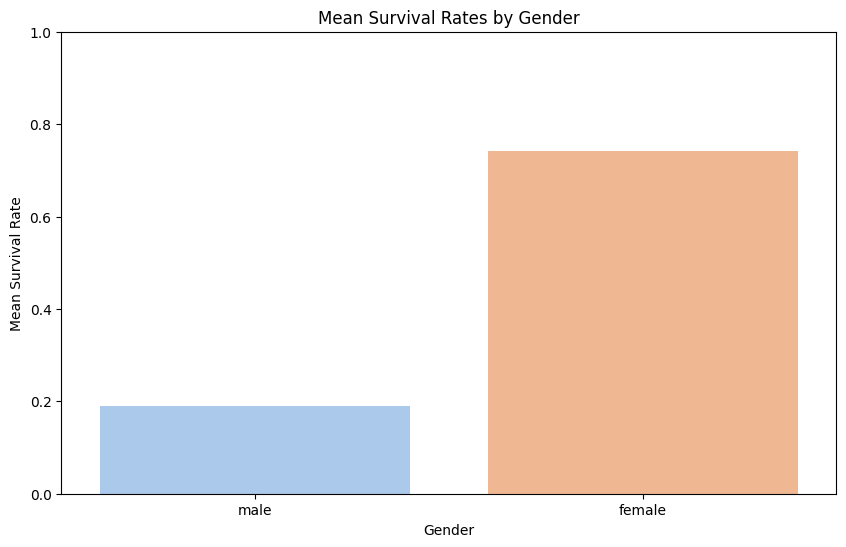

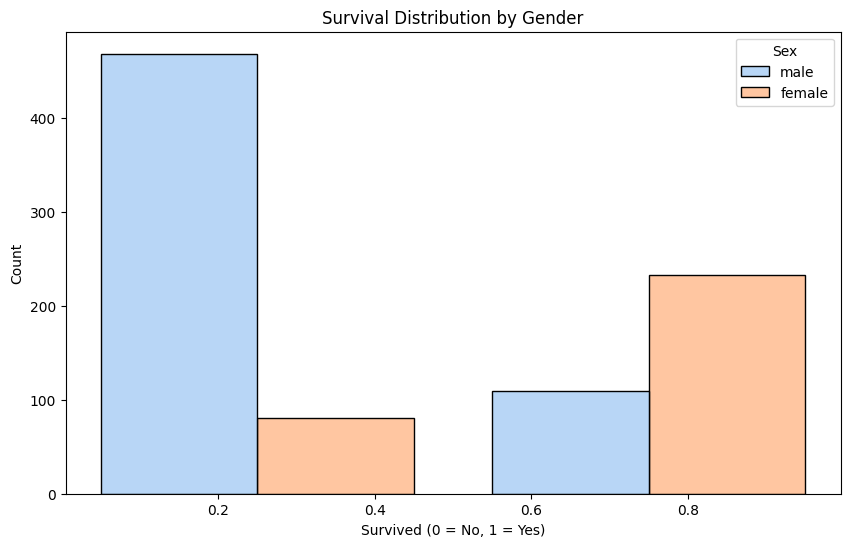

In [ ]:
"""
Problem - 4:

Compare the mean survival rates (’Survived’) for the different groups in the ’Sex’ column. Draw a visual-
ization to show how the survival distributions vary by gender.
"""
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Loading Titanic dataset
titanic_df = pd.read_csv("/content/drive/MyDrive/Concepts of technologies and AI/Titanic-Dataset.csv")

# Compare the mean survival rates for the 'Sex' column
mean_survival_by_sex = titanic_df.groupby("Sex")["Survived"].mean()
print("Mean survival rates by gender:")
print(mean_survival_by_sex)

# Drawing visualization of survival distributions by gender
plt.figure(figsize=(10, 6))
sns.barplot(data=titanic_df, x="Sex", y="Survived", ci=None, palette="pastel")
plt.title("Mean Survival Rates by Gender")
plt.ylabel("Mean Survival Rate")
plt.xlabel("Gender")
plt.ylim(0, 1)
plt.show()

# Drawing histogram to show survival distributions by gender
plt.figure(figsize=(10, 6))
sns.histplot(data=titanic_df, x="Survived", hue="Sex", multiple="dodge", bins=2, shrink=0.8, palette="pastel")
plt.title("Survival Distribution by Gender")
plt.xlabel("Survived (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()


<ipython-input-23-0729abb95e6a>:20: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=titanic_df, x="Sex", y="Survived", hue="Embarked", ci=None, palette="pastel")


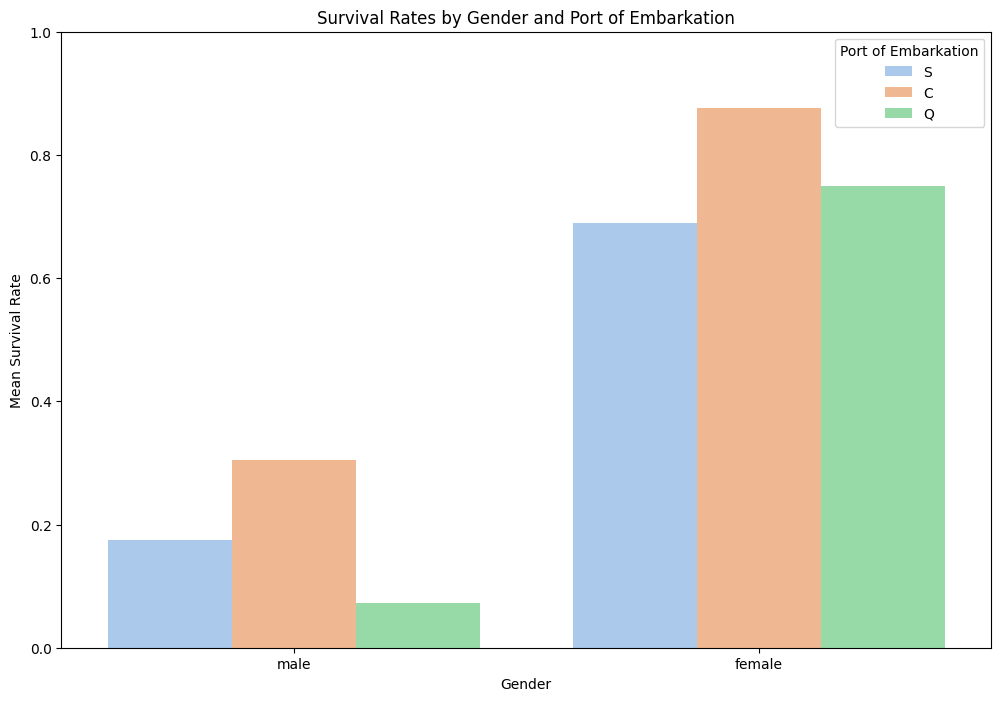

In [ ]:
"""
Problem - 5:

Draw a visualization that breaks your visualization from Exercise 3 down by the port of embarkation (’Em-
barked’). In this instance, compare the ports ’C’ (Cherbourg), ’Q’ (Queenstown), and ’S’ (Southampton).
"""

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Loading Titanic dataset
titanic_df = pd.read_csv("/content/drive/MyDrive/Concepts of technologies and AI/Titanic-Dataset.csv")

# Ensure 'Embarked' column is not null for analysis
titanic_df = titanic_df.dropna(subset=["Embarked"])

# Draw a bar plot comparing survival rates by gender and port of embarkation
plt.figure(figsize=(12, 8))
sns.barplot(data=titanic_df, x="Sex", y="Survived", hue="Embarked", ci=None, palette="pastel")
plt.title("Survival Rates by Gender and Port of Embarkation")
plt.ylabel("Mean Survival Rate")
plt.xlabel("Gender")
plt.ylim(0, 1)
plt.legend(title="Port of Embarkation", loc="upper right")
plt.show()


<ipython-input-24-3283f259e16e>:22: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  survival_rates = titanic_df.groupby(["Pclass", "Age Group"])["Survived"].mean().unstack()


Survival rates by Pclass and Age Group:
Age Group        Q1        Q2        Q3        Q4        Q5
Pclass                                                     
1          0.809524  0.761905  0.666667  0.777778  0.506667
2          0.742857  0.400000  0.416667  0.461538  0.363636
3          0.333333  0.197674  0.283582  0.166667  0.088235


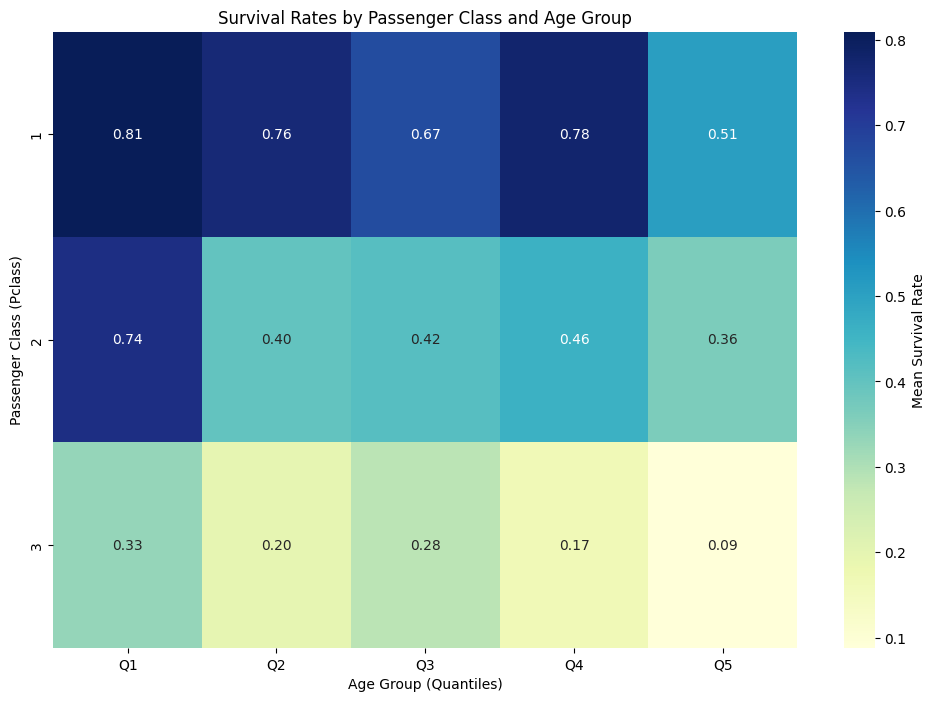

In [ ]:
"""
Problem - 6{Optional}:
Show how the survival rates (’Survived’) vary by age group and passenger class (’Pclass’). Break up the
’Age’ column into five quantiles in your DataFrame, and then compare the means of ’Survived’ by class
and age group. Draw a visualization using a any plotting library to represent this graphically.
"""

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Loading Titanic dataset
titanic_df = pd.read_csv("/content/drive/MyDrive/Concepts of technologies and AI/Titanic-Dataset.csv")

# Drop rows with missing 'Age' or 'Survived' values for analysis
titanic_df = titanic_df.dropna(subset=["Age", "Survived"])

# Create age groups by dividing the 'Age' column into five quantiles
titanic_df["Age Group"] = pd.qcut(titanic_df["Age"], q=5, labels=["Q1", "Q2", "Q3", "Q4", "Q5"])

# Calculate mean survival rates by 'Pclass' and 'Age Group'
survival_rates = titanic_df.groupby(["Pclass", "Age Group"])["Survived"].mean().unstack()

# Print the survival rates table
print("Survival rates by Pclass and Age Group:")
print(survival_rates)

# Draw a heatmap for visualizing survival rates
plt.figure(figsize=(12, 8))
sns.heatmap(
    survival_rates, annot=True, cmap="YlGnBu", fmt=".2f", cbar_kws={"label": "Mean Survival Rate"}
)
plt.title("Survival Rates by Passenger Class and Age Group")
plt.ylabel("Passenger Class (Pclass)")
plt.xlabel("Age Group (Quantiles)")
plt.show()
